In [1]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import numpy as np
import os,cv2
import pickle    

Using TensorFlow backend.


In [0]:
X = pickle.load(open("/content/drive/My Drive/car-damage-dataset.tar/data2a/training/featuresrgb.pickle", "rb"))
Y = pickle.load(open("/content/drive/My Drive/car-damage-dataset.tar/data2a/training/labelsrgb.pickle", "rb"))
X1 = pickle.load(open("/content/drive/My Drive/car-damage-dataset.tar/data2a/validation/featuresrgb.pickle", "rb"))
Y1 = pickle.load(open("/content/drive/My Drive/car-damage-dataset.tar/data2a/validation/labelsrgb.pickle", "rb"))

X=X/255
X1=X1/255
Y=np.array(Y)
Y1=np.array(Y1)


#X=X.reshape(1856,224,224,3)
#X1=X1.reshape(460,224,224,3)

In [27]:
#from keras.utils import to_categorical
from keras.applications import VGG16
from keras import models 
from keras import layers
from keras.optimizers import SGD

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers except the last 4 layers
for layer in base_model.layers[:-4]:
	layer.trainable = False

# Check the trainable status of the individual layers
for layer in base_model.layers:
	print(layer, layer.trainable)

# Create the model
model = models.Sequential()

model.add(base_model)

# add new classifier layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



<keras.engine.input_layer.InputLayer object at 0x7f10ae72c9b0> False
<keras.layers.convolutional.Conv2D object at 0x7f10ae387e10> False
<keras.layers.convolutional.Conv2D object at 0x7f10ae375dd8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f10ae375278> False
<keras.layers.convolutional.Conv2D object at 0x7f10ae39b2b0> False
<keras.layers.convolutional.Conv2D object at 0x7f10ae3a26a0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f10ae3a5198> False
<keras.layers.convolutional.Conv2D object at 0x7f10ae3a5fd0> False
<keras.layers.convolutional.Conv2D object at 0x7f10ae337198> False
<keras.layers.convolutional.Conv2D object at 0x7f10ae33e630> False
<keras.layers.pooling.MaxPooling2D object at 0x7f10ae33ee48> False
<keras.layers.convolutional.Conv2D object at 0x7f10ae33efd0> False
<keras.layers.convolutional.Conv2D object at 0x7f10ae33abe0> False
<keras.layers.convolutional.Conv2D object at 0x7f10ae347780> False
<keras.layers.pooling.MaxPooling2D object at 0x7f10ae347630>

In [28]:
history=model.fit(X,Y, batch_size=10,epochs=5, validation_split=0.1)
test_loss, test_acc = model.evaluate(X1, Y1)
print('test acc= ',test_acc)
print('test loss= ',test_loss)

Train on 881 samples, validate on 98 samples
Epoch 1/5
881/881 [==============================] - 10s 11ms/step - loss: 1.2216 - accuracy: 0.4030 - val_loss: 0.9772 - val_accuracy: 0.5408
Epoch 2/5
881/881 [==============================] - 10s 11ms/step - loss: 0.8971 - accuracy: 0.5766 - val_loss: 0.8237 - val_accuracy: 0.5918
Epoch 3/5
881/881 [==============================] - 10s 11ms/step - loss: 0.6862 - accuracy: 0.7003 - val_loss: 0.7430 - val_accuracy: 0.7041
Epoch 4/5
881/881 [==============================] - 10s 11ms/step - loss: 0.5104 - accuracy: 0.7968 - val_loss: 0.7055 - val_accuracy: 0.6837
Epoch 5/5
176/176 [==============================] - 1s 6ms/step
test acc=  0.7045454382896423
test loss=  0.6568043231964111


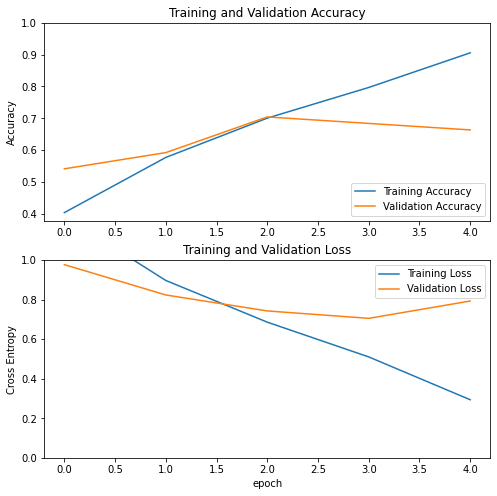

In [30]:
 import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
pickle_out=open("model2.pickle","wb")
pickle.dump(model, pickle_out)
pickle_out.close() 

In [0]:
model2 = pickle.load(open("/content/model1.pickle", "rb"))

In [0]:
img_arr = cv2.imread(os.path.join('/content/depositphotos_182911760-stock-photo-car-body-side-damage-after.jpg'))
new_arr = cv2.resize(img_arr, (224, 224))
image = np.expand_dims(new_arr, axis=0)
image=image/255

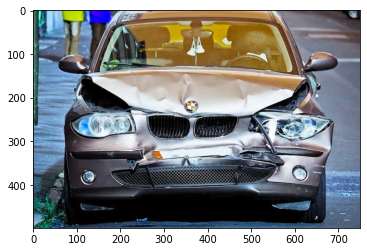

In [33]:
plt.imshow(img_arr)

In [35]:
location=['front','rear','side']
location[np.argmax(model.predict(image))]

'front'

[[3.948960e-04 6.477285e-04 9.989574e-01]]


'side'

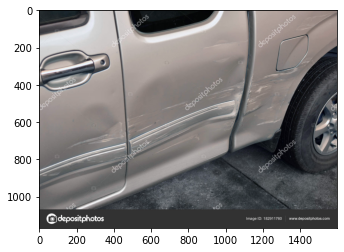

In [40]:
plt.imshow(img_arr)
print(model.predict(image)
location[np.argmax(model.predict(image))]